#### To understand optimize gradient descent, the initial parameter should be selected accordingly 

In [21]:
## importing python libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [22]:
## building a random training and testing dataset from sklearn library 

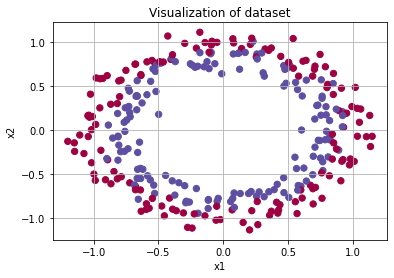

In [23]:
np.random.seed(1)
train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.08)
np.random.seed(2)
test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.05)
# Visualize the data
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral)
plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Visualization of dataset')
train_X = train_X.T
train_Y = train_Y.reshape((1, train_Y.shape[0]))
test_X = test_X.T
test_Y = test_Y.reshape((1, test_Y.shape[0]))

In [24]:
m=train_X.shape
print(m)

(2, 300)


In [25]:
## importing deep layered Neural network 
from NN_deep_layer import NN_deep_layered,predict,forward_propagation

### Running test cases to check if the NN is working or not

In [26]:
!pytest test_NN_deep_layer.py 

============================= test session starts =============================
platform win32 -- Python 3.7.4, pytest-5.4.2, py-1.8.1, pluggy-0.13.1
rootdir: C:\Users\VISWAMBHAR YASA\ML\Deep_learning\DEEP_LEARNING\Neural_network\Deep_layered_NN
collected 4 items

test_NN_deep_layer.py ....                                               [100%]

============================== 4 passed in 0.52s ==============================


## Multi layer Neural networt

In [27]:
layer_dims=[10, 5, 3, 1]
para,cost=NN_deep_layered(train_X,train_Y,layer_dims,num_iter=17000,learning_rate=0.01,print_cost=True,p_ty='He')

Number of Hidden layers in this Neural Network 4
Units in each layer [10, 5, 3, 1]
At Iteration 0  Cost Function  0.6934912644825092
At Iteration 1000  Cost Function  0.6864303333099852
At Iteration 2000  Cost Function  0.6808075014406042
At Iteration 3000  Cost Function  0.6711304184699581
At Iteration 4000  Cost Function  0.643208979520218
At Iteration 5000  Cost Function  0.5995435948966815
At Iteration 6000  Cost Function  0.5561831016234756
At Iteration 7000  Cost Function  0.5179482605928786
At Iteration 8000  Cost Function  0.48947447316557524
At Iteration 9000  Cost Function  0.47377303492239964
At Iteration 10000  Cost Function  0.4529532873667108
At Iteration 11000  Cost Function  0.3562934184673816
At Iteration 12000  Cost Function  0.31038511911033434
At Iteration 13000  Cost Function  0.28302270625279186
At Iteration 14000  Cost Function  0.26617286267643364
At Iteration 15000  Cost Function  0.25623974962567986
At Iteration 16000  Cost Function  0.24954682600256017


In [28]:
print('TRAINING DATASET')
p_t=predict(train_X, train_Y, para, tol=0.5)

TRAINING DATASET
Hidden layer of the Neural Network 4
Accuracy: 90.66666666666667%


In [29]:
print('TESTING DATASET')
p_t=predict(test_X, test_Y, para, tol=0.5)

TESTING DATASET
Hidden layer of the Neural Network 4
Accuracy: 95.0%


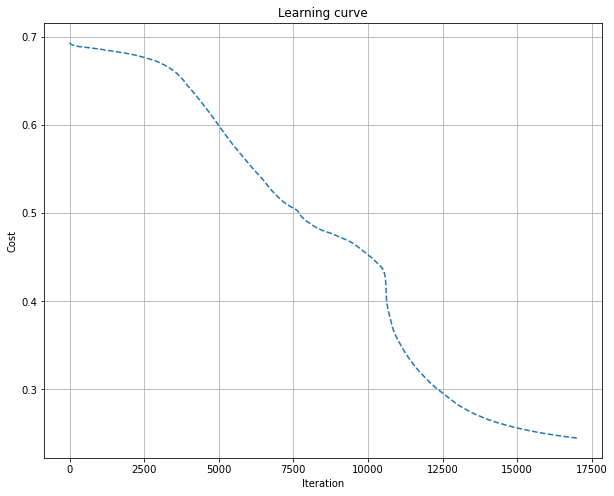

In [30]:
fig,ax=plt.subplots(figsize=(10,8))
ax.plot(cost,'--')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Learning curve')
plt.grid()

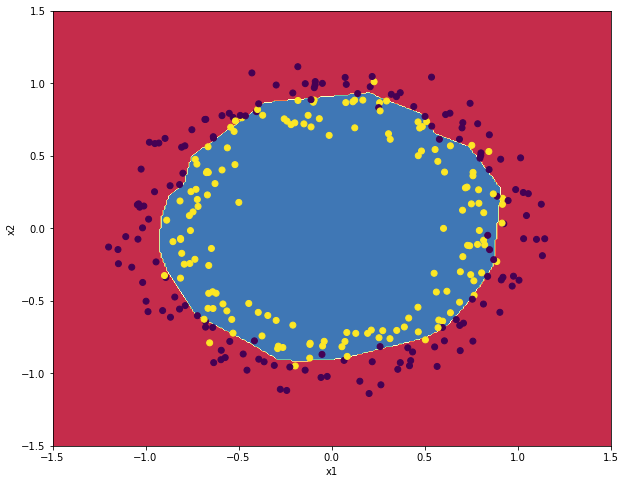

In [31]:
def pred(X, parameters, tol=0.5):
    m = X.shape[1]
    n_layers = len(parameters) // 2
    p = np.zeros((1, m))
    # Forward propagation
    probas, fw_caches = forward_propagation(X, parameters)
    # Activation function
    for i in range(0, probas.shape[1]):
        if probas[0, i] > tol:
            p[0, i] = 1
        else:
            p[0, i] = 0
    return p
X=train_X
Y=train_Y
x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole grid
Z = pred(np.c_[xx.ravel(), yy.ravel()].T,para)
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
ax,fig=plt.subplots(figsize=(10,8))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.scatter(X[0, :], X[1, :], c=Y)


 Neural network using He intialization
Number of Hidden layers in this Neural Network 4
Units in each layer [10, 5, 3, 1]
TRAINING DATASET
Hidden layer of the Neural Network 4
Accuracy: 90.66666666666667%
TESTING DATASET
Hidden layer of the Neural Network 4
Accuracy: 95.0%

 Neural network using ranm intialization
Number of Hidden layers in this Neural Network 4
Units in each layer [10, 5, 3, 1]
TRAINING DATASET
Hidden layer of the Neural Network 4
Accuracy: 49.99999999999999%
TESTING DATASET
Hidden layer of the Neural Network 4
Accuracy: 50.0%

 Neural network using zero intialization
Number of Hidden layers in this Neural Network 4
Units in each layer [10, 5, 3, 1]
TRAINING DATASET
Hidden layer of the Neural Network 4
Accuracy: 49.99999999999999%
TESTING DATASET
Hidden layer of the Neural Network 4
Accuracy: 50.0%


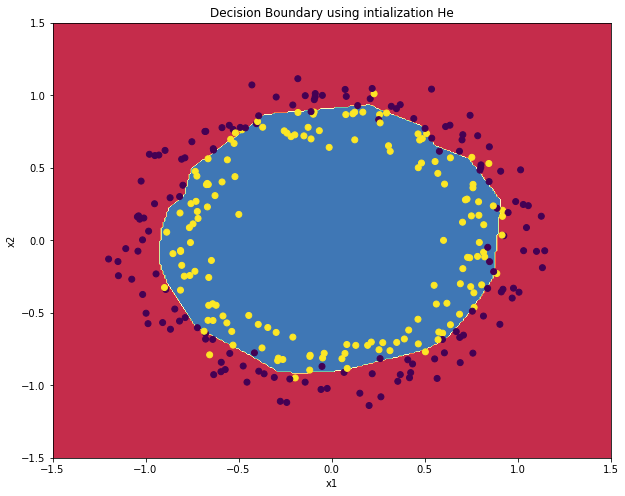

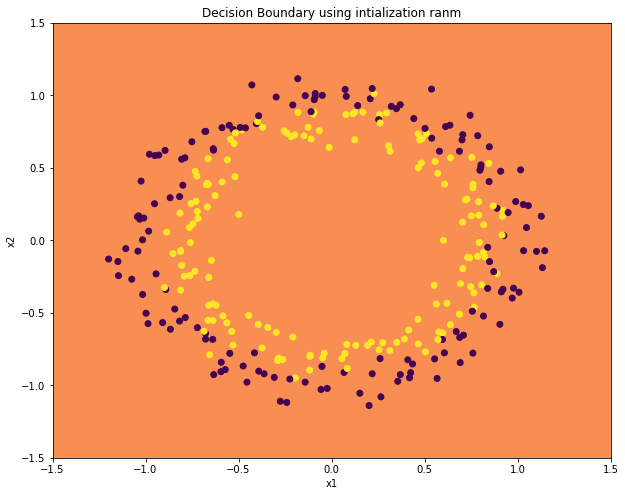

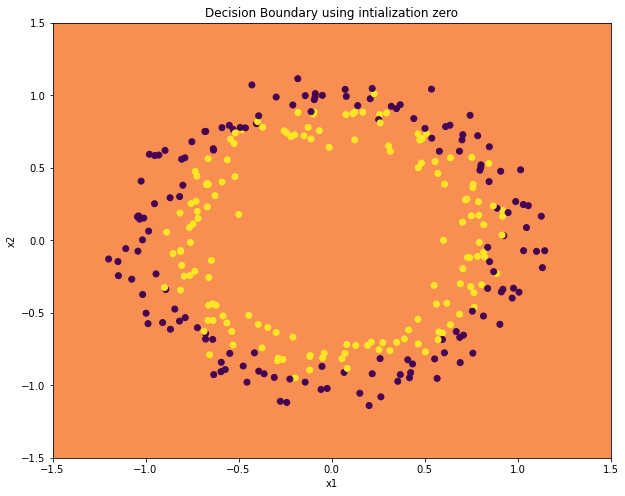

In [32]:
### Running Neural network for different initialization and checking the parameters
layer_dims=[10, 5, 3, 1]
ls=['He','ranm','zero']
for i,p_t in enumerate(ls):
    print('\n Neural network using', p_t,'intialization')
    para,cost=NN_deep_layered(train_X,train_Y,layer_dims,num_iter=17000,learning_rate=0.01,print_cost=False,p_ty=p_t)   
    print('TRAINING DATASET')
    p_train=predict(train_X, train_Y, para, tol=0.5)
    print('TESTING DATASET')
    p_test=predict(test_X, test_Y, para, tol=0.5)
    X=train_X
    Y=train_Y
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = pred(np.c_[xx.ravel(), yy.ravel()].T,para)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    ax,fig=plt.subplots(figsize=(10,8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.title('Decision Boundary using intialization {}'.format(p_t))
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.5,1.5)
    plt.scatter(X[0, :], X[1, :], c=Y)